<a href="https://colab.research.google.com/github/jays2241/Regression-Bike-sharing-demand-prediction-/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Jay Sawant

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/jays2241/Regression-Bike-sharing-demand-prediction-

# **Problem Statement**


**To develop a machine learning model that can forecast the number of bikes that will be rented at a given time, enabling bike sharing service providers to optimize their operations and meet customer demand efficiently.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io
import calendar
from google.colab import files
scores_files = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData (1).csv


### Dataset Loading

In [2]:
# Load Dataset
original_data = pd.read_csv(io.BytesIO(scores_files['SeoulBikeData.csv']), encoding='ISO-8859-1')
df = original_data.copy()

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

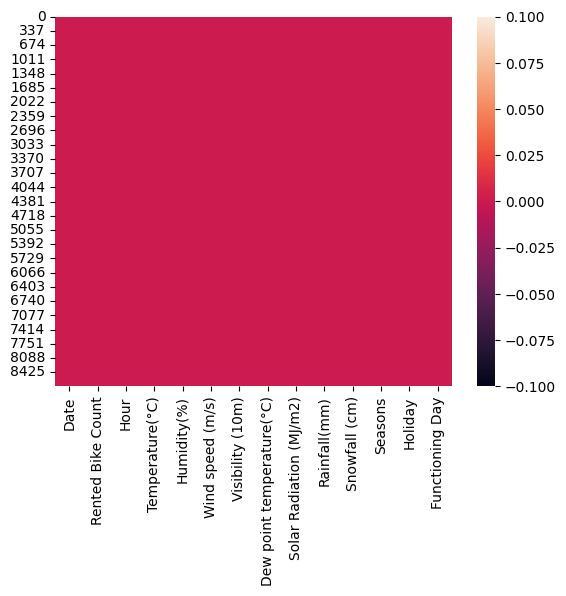

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

1. Date: The date on which the bike rental occurred.
2. Rented Bike Count: The number of bikes rented at a given time.
3. Hour: The hour of the day when the bike rental took place.
4. Temperature: The temperature in degrees Celsius at the time of the bike rental.
5. Humidity: The relative humidity percentage at the time of the bike rental.
6. Wind speed: The wind speed in meters per second at the time of the bike rental.
7. Visibility: The visibility in meters at the time of the bike rental.
8. Dew point temperature: The dew point temperature in degrees Celsius at the time of the bike rental.
9. Solar Radiation: The solar radiation in megajoules per square meter at the time of the bike rental.
10. Rainfall: The amount of rainfall in millimeters at the time of the bike rental.
11. Snowfall: The amount of snowfall in centimeters at the time of the bike rental.
12. Seasons: The season of the year (e.g., spring, summer, fall, winter).
13. Holiday: An indicator variable indicating whether the date is a holiday or not.
14. Functioning Day: An indicator variable indicating whether it is a functioning day or not.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
original_data['Date'] = pd.to_datetime(original_data['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis = 1 , inplace = True)


<ipython-input-12-c959b693c805>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-12-c959b693c805>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  original_data['Date'] = pd.to_datetime(original_data['Date'])


In [13]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [14]:
grouped_data = original_data.groupby(original_data["Date"].dt.month)["Rented Bike Count"].sum().reset_index()
grouped_data["Month"] = grouped_data["Date"].apply(lambda x: calendar.month_name[x])

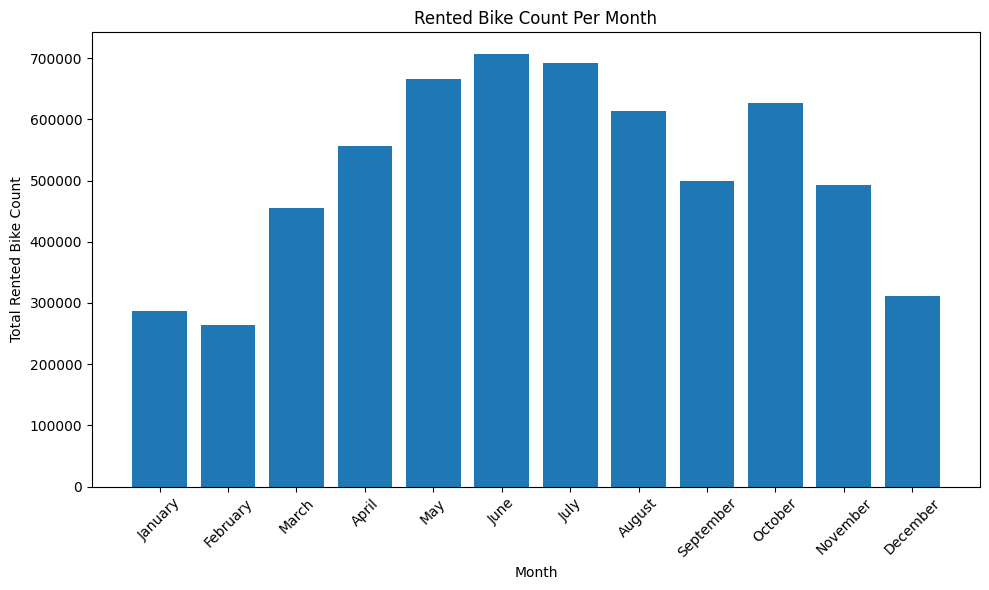

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data["Month"], grouped_data["Rented Bike Count"])
plt.xlabel("Month")
plt.ylabel("Total Rented Bike Count")
plt.title("Rented Bike Count Per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart makes easy and convininet to determine the month of high demand

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

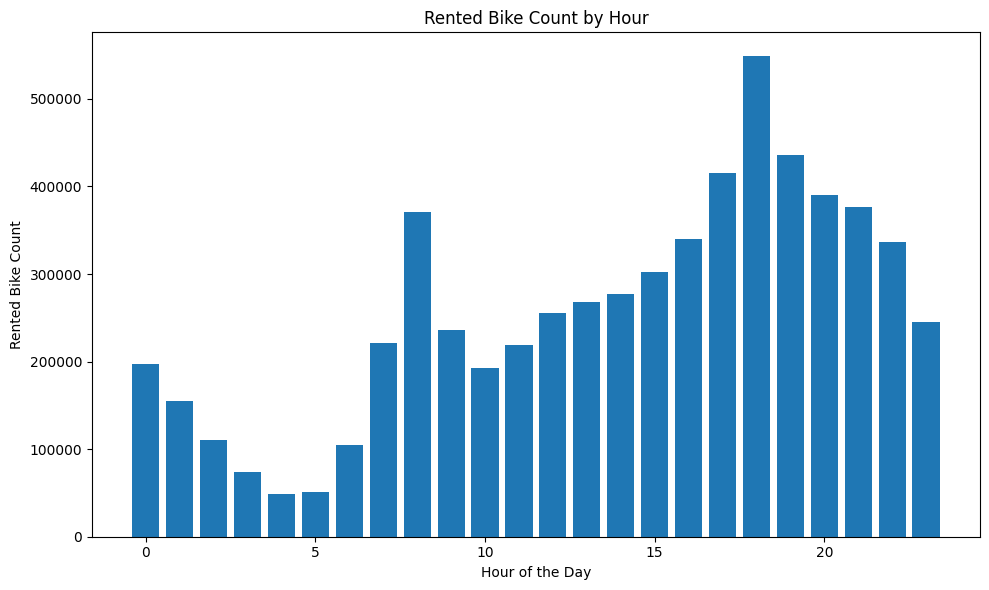

In [16]:
# Chart - 2 visualization code
hour = df.groupby("Hour")["Rented Bike Count"].sum()

# Create a bar plot of rented bike count by hour
plt.figure(figsize=(10, 6))
plt.bar(hour.index, hour.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Rented Bike Count")
plt.title("Rented Bike Count by Hour")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It helps to easily identify the time of the day having maximum demand.

##### 2. What is/are the insight(s) found from the chart?

Minimum demand hour:- 4am

Maximum demand hour:- 6pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights will help create a positive business impact. They can be used to maximize revenue by increasing the rental price during peak hours, where there is high demand for bike rentals. Additionally, the rental price can be decreased during non-peak hours to attract more customers and ensure optimal utilization of the bike-sharing service.

#### Chart - 3

[]

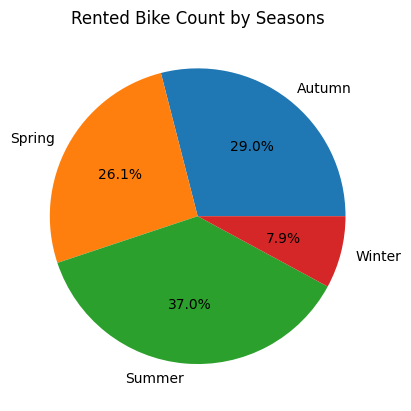

In [17]:
# Chart - 3 visualization code
seasons_group = df.groupby(['Seasons'])['Rented Bike Count'].sum()
plt.pie(seasons_group,labels=seasons_group.index,autopct='%1.1f%%')
plt.title("Rented Bike Count by Seasons")
plt.plot()

##### 1. Why did you pick the specific chart?

The pie chart allows for a quick comparison of the rented bike count distribution among seasons. It enables you to identify the dominant seasons with the highest bike rental counts and easily compare them to the other seasons.

##### 2. What is/are the insight(s) found from the chart?

Season Distribution: The pie chart provides a visual representation of the distribution of rented bike count across four seasons: Autumn, Spring, Summer, and Winter.

Highest Season: The largest slice in the pie chart corresponds to the "Summer" season, indicating that it has the highest proportion of the rented bike count among all seasons.

Varied Demand: The chart shows that the rented bike count is relatively evenly distributed among the other three seasons: Autumn, Spring, and Winter. While there may be some variations, their proportions are comparable.

Seasonal Proportions: The percentages displayed next to each slice indicate the proportional contribution of each season to the total rented bike count. The percentages are as follows: Autumn (29.0%), Spring (26.1%), Summer (37.0%), and Winter (7.9%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Resource Allocation: The insights regarding the distribution of rented bike count among seasons can assist in resource allocation. The business can allocate resources such as bikes, staff, and marketing efforts more efficiently during peak seasons (e.g., Summer) to meet the higher demand. This can result in improved customer satisfaction and increased revenue.

2. Pricing and Promotions: Understanding the seasonal variations in bike rentals can help optimize pricing strategies. For example, during high-demand seasons, such as Summer, the business can consider adjusting the rental prices to maximize revenue. Additionally, promotional activities can be tailored to attract more customers during off-peak seasons, such as Winter, to stimulate demand and mitigate potential negative impact.

Negative Business Impact:

1. Seasonal Dependency: If the business heavily relies on a specific season with high bike rental demand (e.g., Summer) and neglects other seasons, it may face challenges during the off-peak periods. This could result in reduced revenue and profitability. To mitigate this, the business should explore strategies to diversify offerings, attract customers during non-peak seasons, or adapt the business model to cater to different market segments.

2. Weather Dependency: If the rented bike count is strongly correlated with weather patterns for certain seasons, such as rain affecting the demand in Spring or extreme cold impacting Winter rentals, the business may face challenges due to unpredictable weather conditions. Such weather-related fluctuations can lead to lower rentals and revenue during adverse weather conditions.

#### Chart - 4

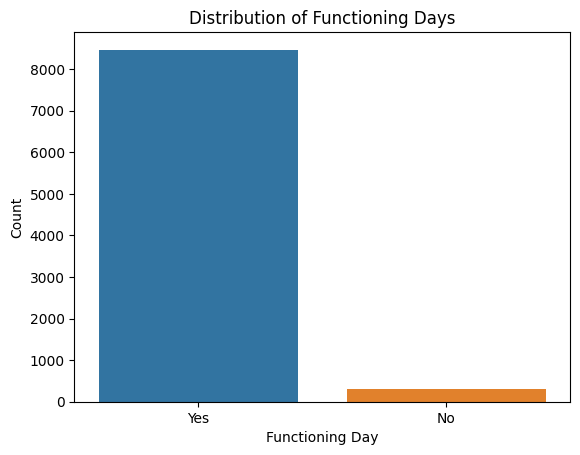

In [18]:
# Chart - 4 visualization code
sns.countplot(data=df, x="Functioning Day")
plt.xlabel("Functioning Day")
plt.ylabel("Count")
plt.title("Distribution of Functioning Days")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

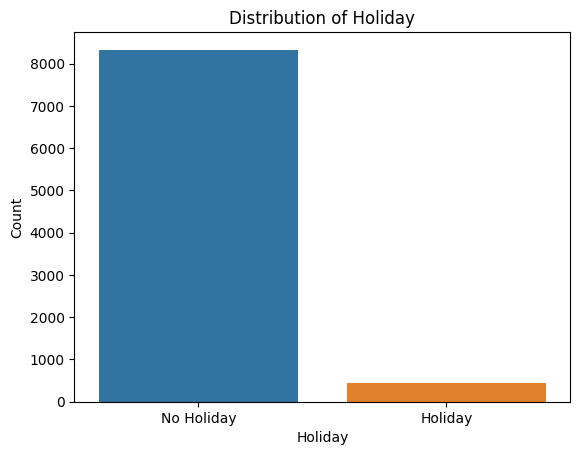

In [19]:
# Chart - 5 visualization code
sns.countplot(data=df, x="Holiday")
plt.xlabel("Holiday")
plt.ylabel("Count")
plt.title("Distribution of Holiday")
plt.show()

##### 1. Why did you pick the specific chart?

Bar char helps us to easily identify the number of holidays and no holiday

##### 2. What is/are the insight(s) found from the chart?

The difference between the no holiday and holiday is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The countplot you provided analyzes the distribution of holidays in the dataset. While this plot alone may not directly provide insights on bike rental demand or growth, it can be a useful visualization for understanding the occurrence and distribution of holidays in the dataset.

#### Chart - 6

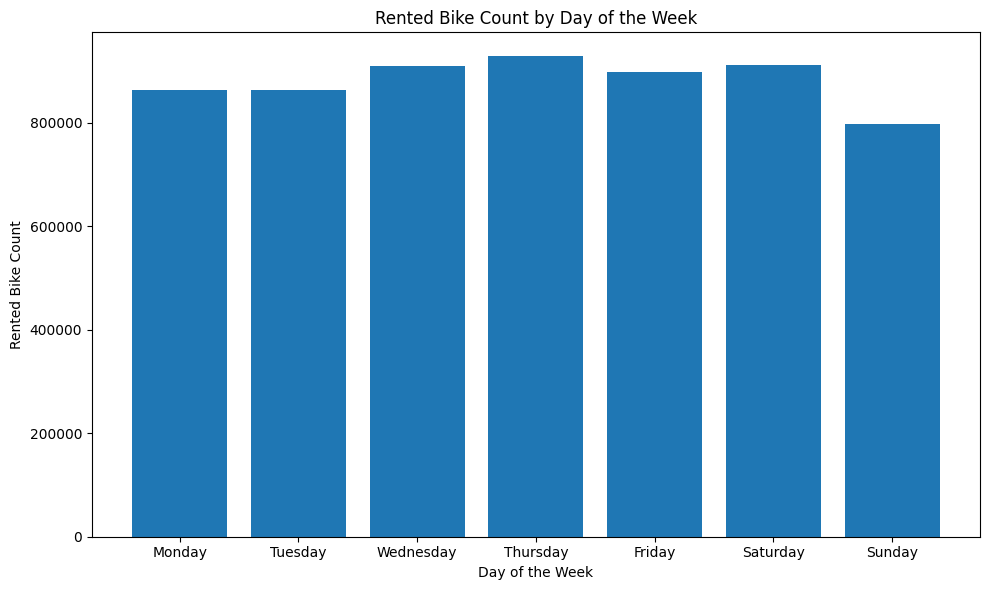

In [20]:
# Chart - 6 visualization code
# Extract the day of the week from the date

# Define the order of days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group the dataset by day of the week and calculate the sum of "Rented Bike Count" for each day
grouped_data = df.groupby("Weekday")["Rented Bike Count"].sum().reindex(day_order)

# Create a bar plot of rented bike count by day of the week
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Day of the Week")
plt.ylabel("Rented Bike Count")
plt.title("Rented Bike Count by Day of the Week")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart to analyse the variations in demand on different days of week.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a higher rented bike count on weekdays (Monday to Friday) compared to weekends (Saturday and Sunday). This suggests that bike rentals are more frequent during weekdays, potentially indicating commuting or work-related usage patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights regarding the rented bike count by day of the week can assist in resource allocation. By understanding the patterns of higher demand on weekdays and lower demand on weekends, the business can allocate resources such as bikes, staff, and operational support more efficiently. This can result in improved customer satisfaction, optimized resource utilization, and increased revenue.

#### Chart - 7

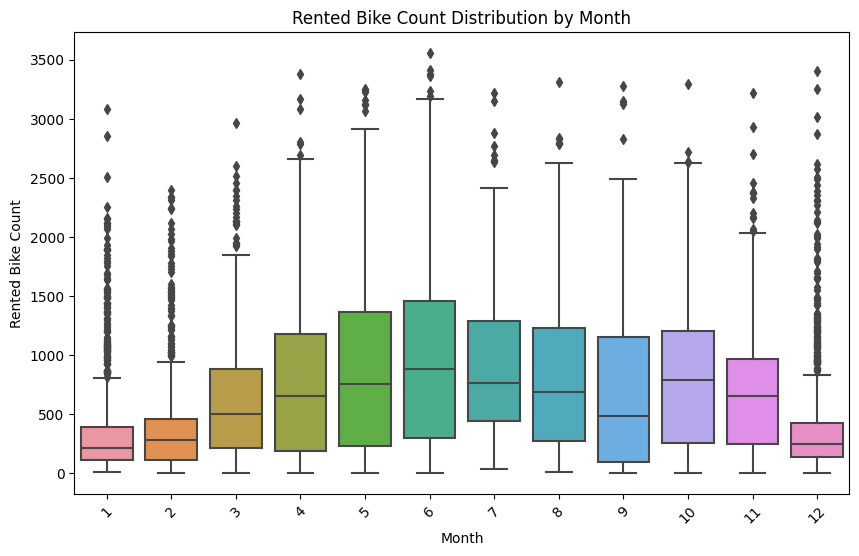

In [21]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Rented Bike Count')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution by Month')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

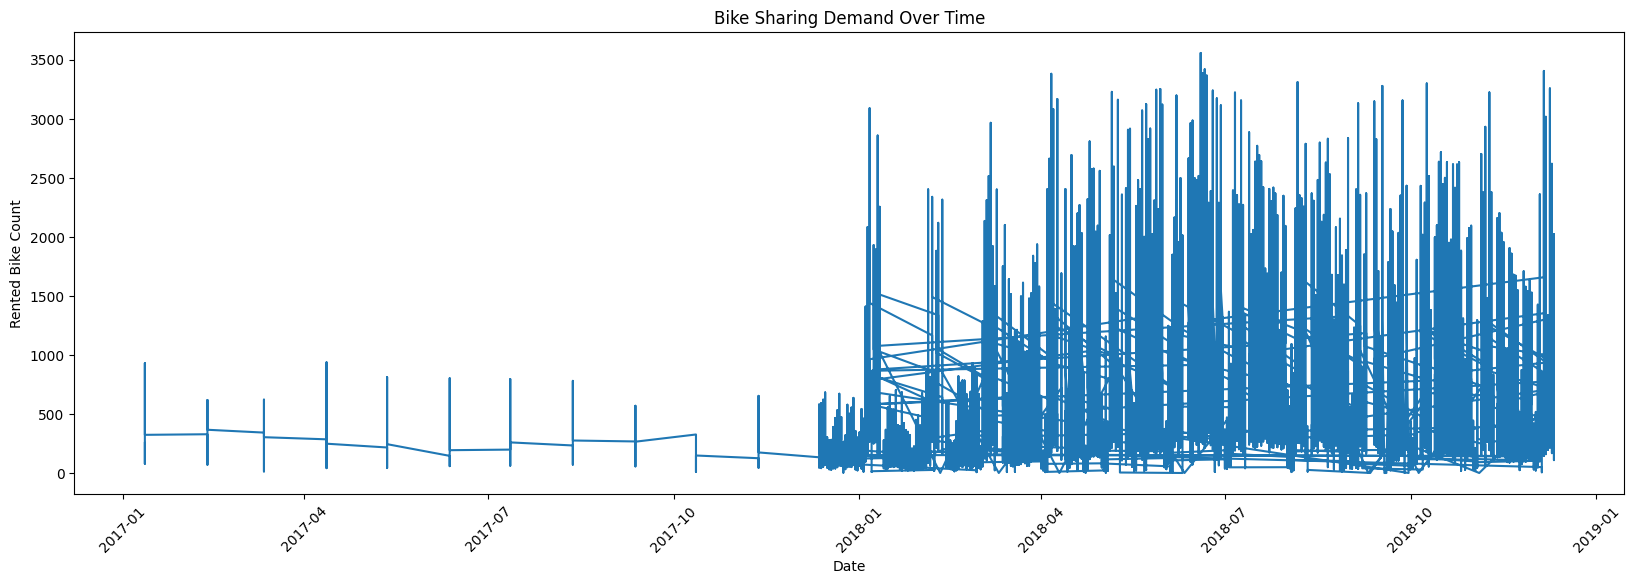

In [22]:
# Chart - 8 visualization code
plt.figure(figsize=(20, 6))
plt.plot(original_data['Date'], df['Rented Bike Count'])
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.title('Bike Sharing Demand Over Time')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

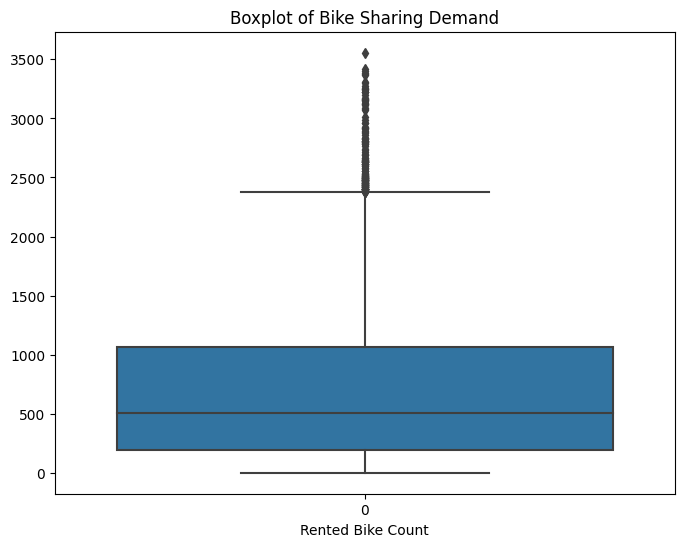

In [23]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(df['Rented Bike Count'])
plt.xlabel('Rented Bike Count')
plt.title('Boxplot of Bike Sharing Demand')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

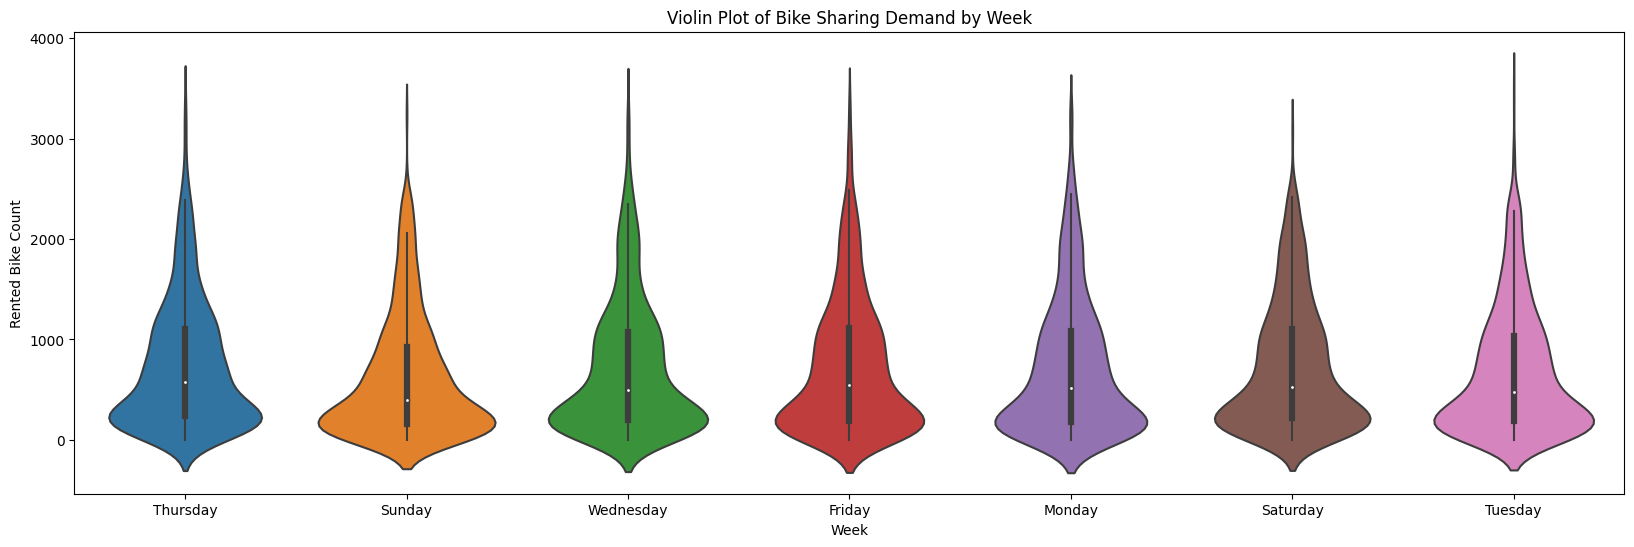

In [24]:
# Chart - 10 visualization code
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='Weekday', y='Rented Bike Count')
plt.xlabel('Week')
plt.ylabel('Rented Bike Count')
plt.title('Violin Plot of Bike Sharing Demand by Week')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [25]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [26]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [27]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-28-25d4677e3c59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


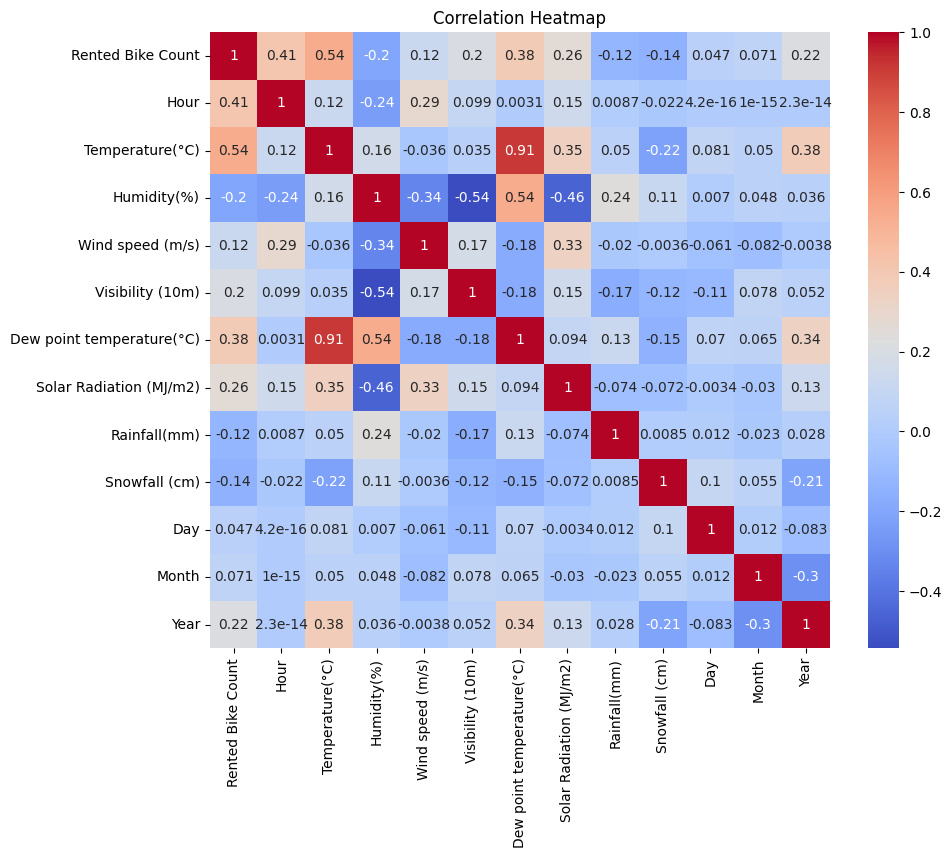

In [28]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [29]:
# sns.pairplot(df)
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. by looking at day vs the rented bike count we can say that there is less demand in day 1,2,3 and 12 on this day we can suggest the company to do the servicing of the bikes.

2. from snowfall vs bike rented count graph we can see that when there is more snowfall there is less demand for bike and more demand when there is now snowfall.

3. form rainfall: when rain fall is more then the bike demand is less and vice versa.

4. there is direct correlation between snowfall so we will use only one feature for building our machine learning model.if we use both the columns then  the model training will require more time.

5. solar radiation vs rented bike: when there is more solar radiation then the bike demand is impacted. but the impact is not very high.

6. dew point temperature: when ther is low temperature the bike demand is low.

7. Visivility: visibility less bike less.

8. windspeed: when wind speed is more then people drive less bike.

9. Temperature: when temperature is less then people dirve less.

10. hours: when there is peak hours then we can increase the price at that hour.. ola uber do the same.

11. rented bike is right sqewed.




## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between temperature and the number of rented bikes.

Alternative Hypothesis (H1): There is a significant correlation between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

temperature = df['Temperature(°C)']
rented_bike_count = df['Rented Bike Count']

corr, p_value = stats.pearsonr(temperature, rented_bike_count)

alpha = 0.05

if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant correlation between temperature and the number of rented bikes."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant correlation between temperature and the number of rented bikes."

print(conclusion)

Reject the null hypothesis. There is a significant correlation between temperature and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

Pearson correlation coefficient

##### Why did you choose the specific statistical test?

I chose the Pearson correlation test for Hypothesis 1 because it is commonly used to measure the strength and direction of the linear relationship between two continuous variables. In this case, the hypothesis was related to the correlation between temperature (a continuous variable) and the number of rented bikes (also a continuous variable).


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of rented bikes is the same during weekdays and weekends.

Alternative Hypothesis (HA): The average number of rented bikes differs between weekdays and weekends.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind


# Separate the data into weekdays and weekends
weekday_data = df[df["Functioning Day"] == "Yes"]
weekend_data = df[df["Functioning Day"] == "No"]

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(weekday_data["Rented Bike Count"], weekend_data["Rented Bike Count"], equal_var=False)

# Print the t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 104.43883373793625
P-value: 0.0
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

 I used an independent two-sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test for Hypothesis 2 because it is commonly used to compare the means of two independent groups. In this case, the hypothesis involved comparing the bike sharing demand between weekdays and weekends, which are two distinct and independent groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of rented bikes is the same during different seasons.

Alternative Hypothesis (HA): The average number of rented bikes differs between different seasons.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Perform one-way ANOVA
seasons = ["Spring", "Summer", "Fall", "Winter"]
season_data = [df[df["Seasons"] == season]["Rented Bike Count"] for season in seasons]

f_stat, p_value = f_oneway(*season_data)

# Print the F-statistic and p-value
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Determine the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


##### Which statistical test have you done to obtain P-Value?


The statistical test used to obtain the p-value for the hypothesis that the average number of rented bikes is the same during different seasons is an analysis of variance (ANOVA) test.

##### Why did you choose the specific statistical test?

The ANOVA test was chosen for this hypothesis because it is suitable for comparing the means of multiple groups (in this case, the different seasons). ANOVA allows us to determine if there is a significant difference in the means of the groups and identify which groups, if any, have significantly different means. Since we are comparing the average number of rented bikes across different seasons, ANOVA provides a comprehensive analysis to assess if there are significant variations among the seasons.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Weekday                      0
Day                          0
Month                        0
Year                         0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no any missing values in any of the column therefore I havent used any imputation technique.

### 2. Handling Outliers

In [34]:
df.skew().sort_values(ascending= True)

<ipython-input-34-f720209dc174>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending= True)


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [35]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.pop()

Symmetric Distributed Features : - ['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'Year']
Skew Symmetric Distributed Features : - ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Day', 'Month']


'Month'

In [36]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [37]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [38]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [39]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

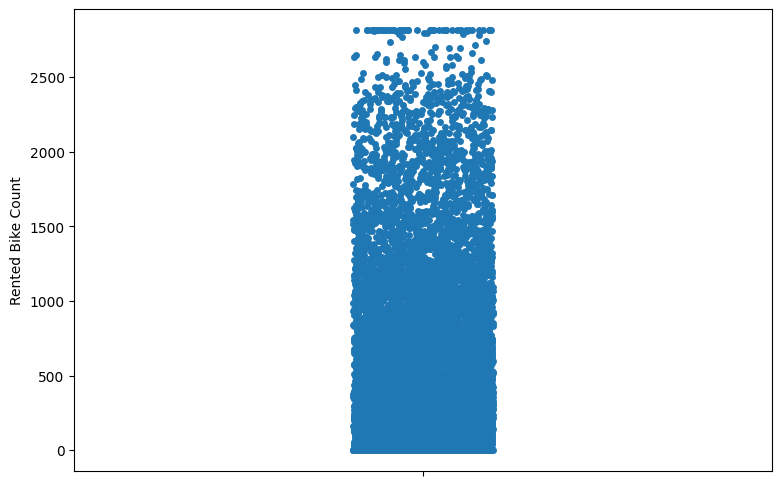

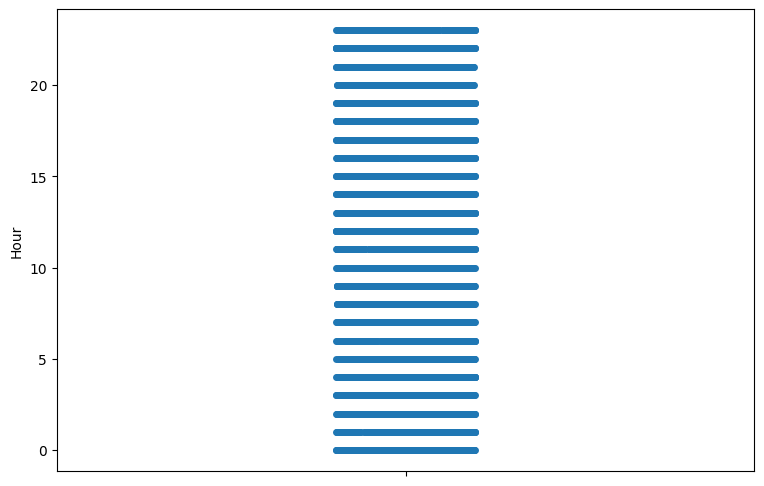

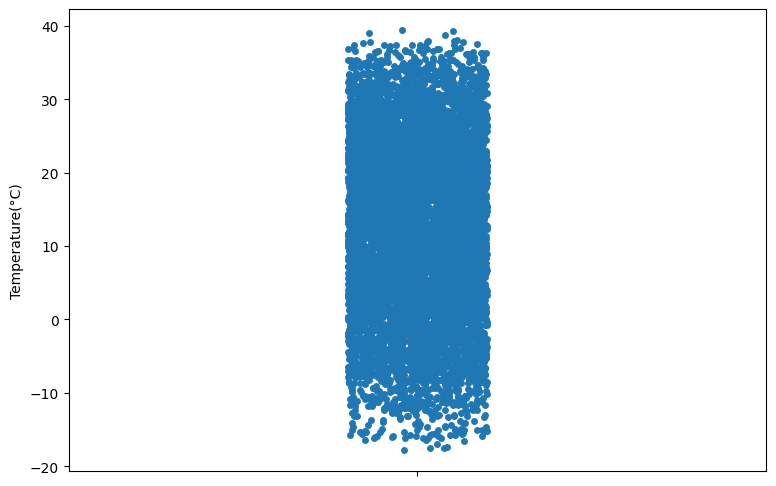

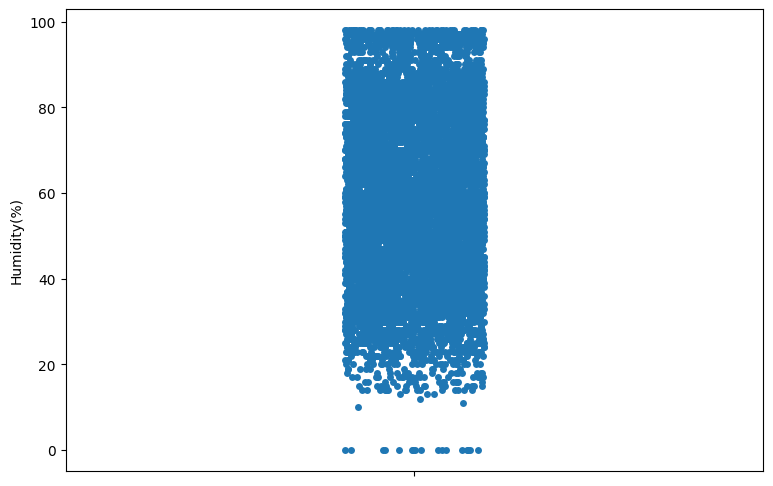

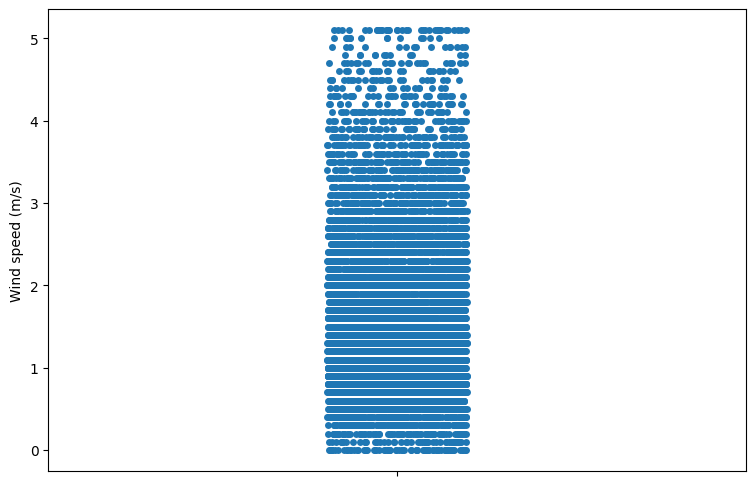

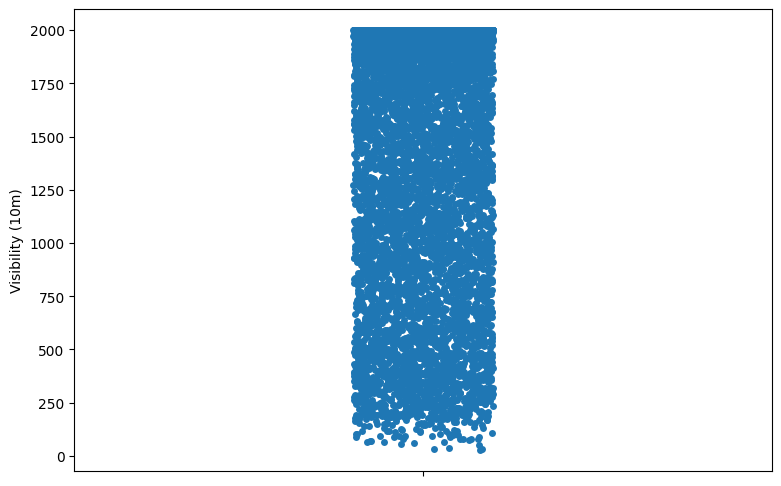

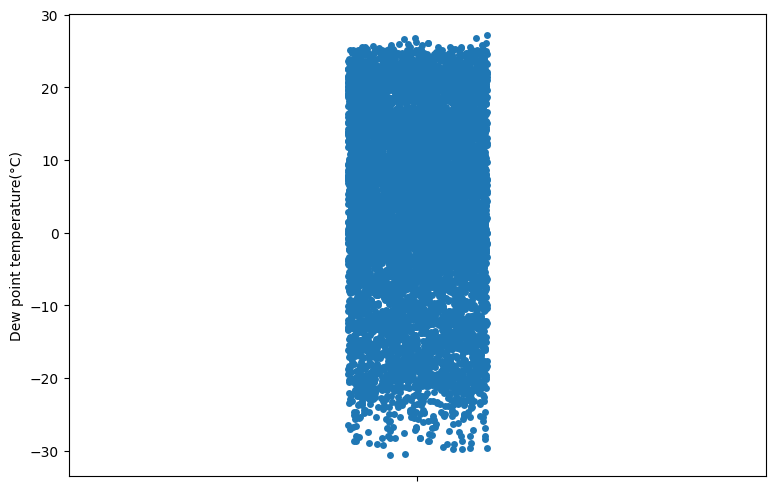

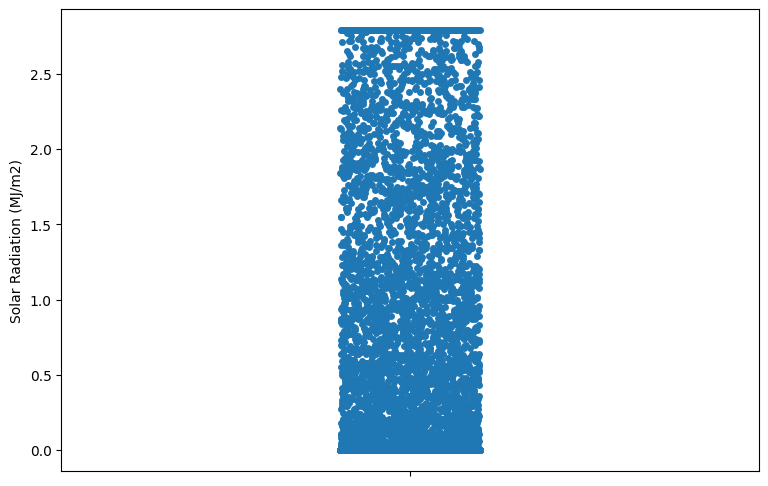

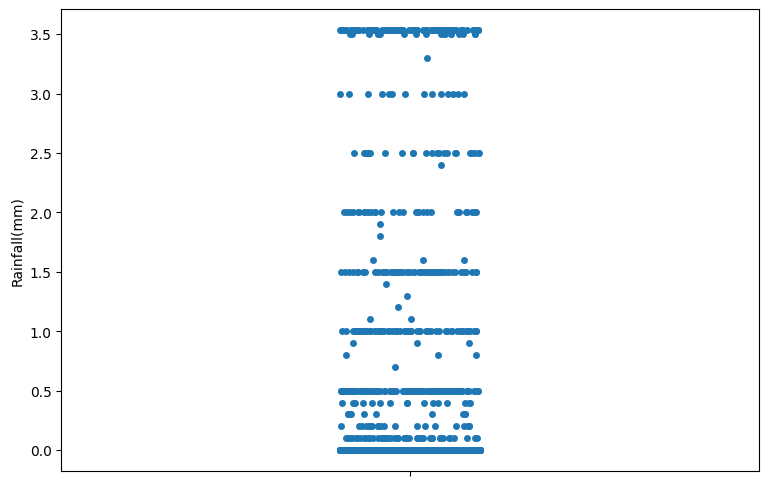

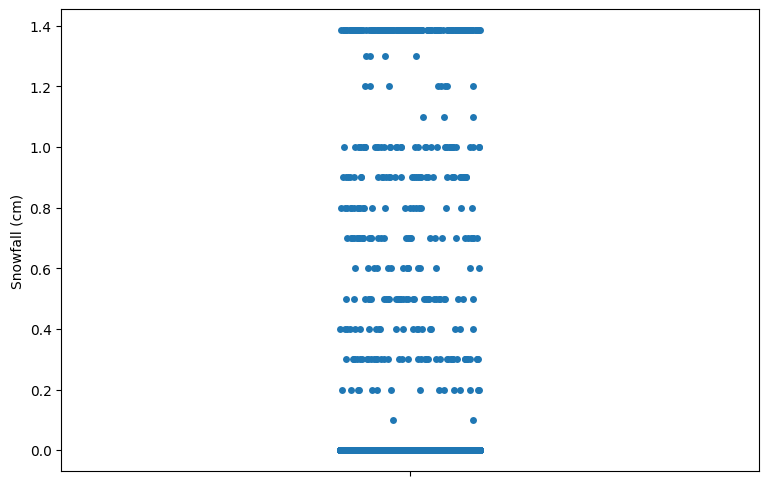

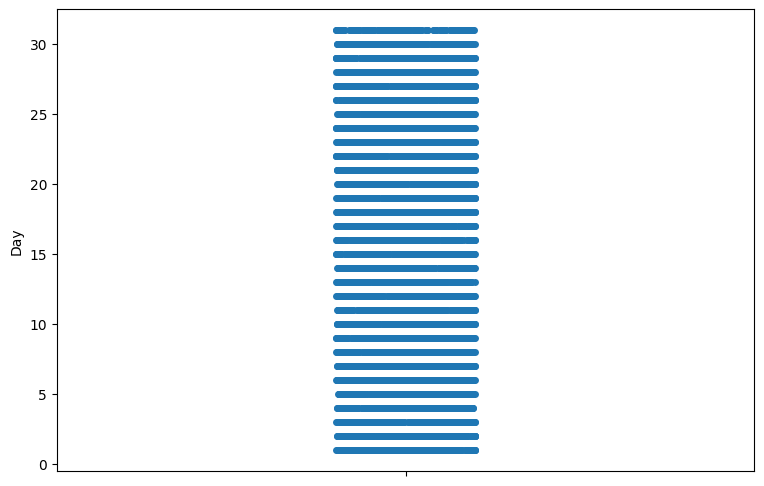

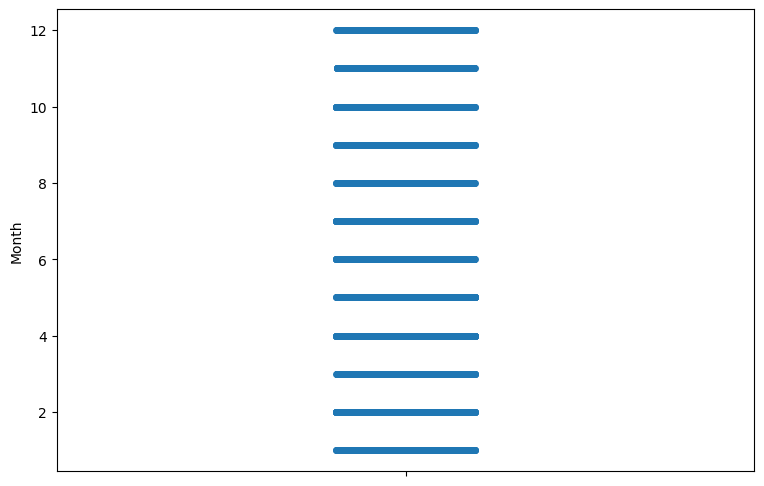

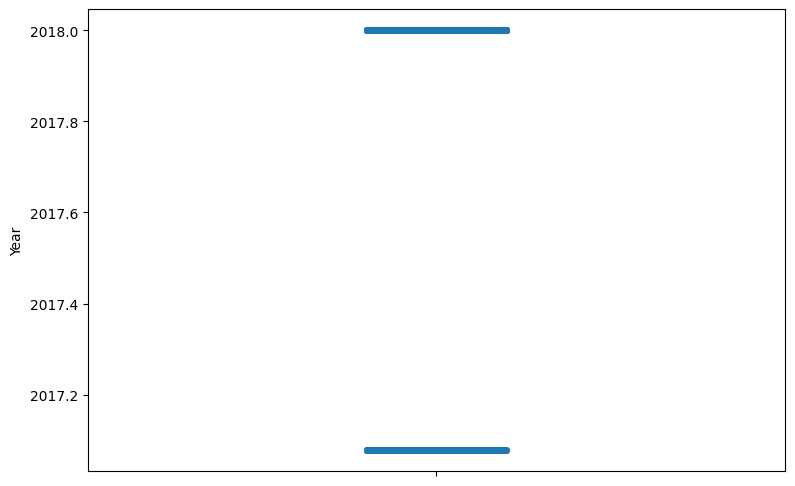

In [40]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I separated the skew-symmetric and symmetric features and defined the upper and lower boundaries as follows. Since it is a classification problem, I restricted both boundaries and pulled down the higher values to the upper limit. For example, if a person is churning with a value of 150 for any column, but the IQR and upper boundary range is 140, it is quite possible that they will also churn for a value of 140. Therefore, I restricted the value to 140, which is the upper boundary.

Another approach is to drop extreme values, but I didn't do that due to the small number of data points available.

In a Gaussian distribution, which is a symmetric curve, outliers may be present. In such cases, we can set the boundaries by considering the standard deviation.

The box plot is a useful graphical display for describing the behavior of data in the middle as well as at the ends of the distributions. It uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). The interquartile range (IQR), which is the difference between Q3 and Q1, is used to construct the box plot. To identify extreme values in the tails of the distribution, the following quantities (called fences) are used:

- Lower inner fence: Q1 - 1.5 * IQR
- Upper inner fence: Q3 + 1.5 * IQR
- Lower outer fence: Q1 - 3 * IQR
- Upper outer fence: Q3 + 3 * IQR

### 3. Categorical Encoding

In [41]:
df.shape

(8760, 17)

In [42]:
# Specify the categorical columns to be encoded
categorical_columns = ['Seasons', 'Holiday','Weekday' ,'Functioning Day']

In [43]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [44]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [45]:
df['Weekday'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Weekday, dtype: int64

In [46]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [47]:
df['Holiday'] = df['Holiday'].map({'No Holiday': 0 , 'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'No':0,'Yes':1})

In [48]:
df_seasons = pd.get_dummies(df['Seasons'],drop_first = True)
df_weekday = pd.get_dummies(df['Weekday'],drop_first = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Weekday                    8760 non-null   objec

In [50]:
df = pd.concat([df,df_seasons,df_weekday],axis = 1)

In [51]:
df.drop(['Seasons','Weekday'],axis = 1 , inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Day                        8760 non-null   int64  
 13  Month                      8760 non-null   int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding creates binary columns for each unique category in the original variable, where a value of 1 represents the presence of that category, and 0 represents the absence. This technique is suitable when there is no inherent order or relationship between the categories.

The reason for using one-hot encoding is that it allows machine learning algorithms to interpret and utilize categorical data effectively. By converting categorical variables into numerical features, we enable algorithms to perform mathematical operations on the data and capture any patterns or relationships that may exist.

### 4. Textual Data Preprocessing
(Based on the provided dataset, it appears that the dataset contains a mix of numerical and categorical variables. The categorical variables have already been encoded using one-hot encoding, as indicated by the additional columns with binary values.

If you are planning to use this dataset for machine learning tasks, the current preprocessing steps seem sufficient. The numerical variables are already in a suitable format for modeling, and the categorical variables have been encoded to numerical representations.)

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

In [64]:
# by seeing heatmap we can remove dew point 1.dewpoint temperature 2.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(data):
  vif =pd.DataFrame()
  vif['variables']=data.columns
  vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

In [66]:
not_for_vif = ['Day','Month','Year','Rented Bike Count']

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.531985
1,Temperature(°C),48.281994
2,Humidity(%),22.700093
3,Wind speed (m/s),5.034389
4,Visibility (10m),9.914888
5,Dew point temperature(°C),30.807725
6,Solar Radiation (MJ/m2),2.947942
7,Rainfall(mm),1.185884
8,Snowfall (cm),1.221881
9,Holiday,1.083235


In [67]:
df.drop(['Dew point temperature(°C)'],axis = 1 , inplace = True)

In [68]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Dropping Constant and Quasi Constant Features
def dropping_constant(data):
    from sklearn.feature_selection import VarianceThreshold
    var_thres = VarianceThreshold(threshold=0.05)
    var_thres.fit(encoded_data)
    concol = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
    if "Rented Bike Count" in concol:
        concol.remove("Rented Bike Count")
    else:
        pass
    df_removed_var = data.drop(concol, axis=1)
    return df_removed_var

# Calling the function
df_removed_var = dropping_constant(encoded_data)

# Checking Variable Inflation Factor (VIF)
# the independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print features with VIF greater than or equal to 8
high_vif_features = vif_data[vif_data["VIF"] >= 8]["Feature"]
print(high_vif_features)

# Remove the features with high VIF
df_removed_var.drop(high_vif_features, axis=1, inplace=True)

# Perform additional preprocessing steps as per your requirements
# ...

# Further analysis or modeling using the modified dataset
# ...


NameError: ignored

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***